![Airbnb logo](https://japanesquest.com/wp-content/uploads/2017/10/airbnb-logo.png)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import GridSearchCV


from sklearn.metrics import mean_squared_error

In [2]:
clean_sum_listings = pd.read_csv('clean_sum_listings.csv')

In [3]:
clean_sum_listings.columns

Index(['Unnamed: 0', 'name', 'host_id', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

### 1. Data Transformation

### 1.1 Logaritmic Transformation

In [4]:
clean_sum_listings['price_log'] = np.log1p(clean_sum_listings.price)

Text(0.5, 1.0, 'Log-Price Distribution Plot')

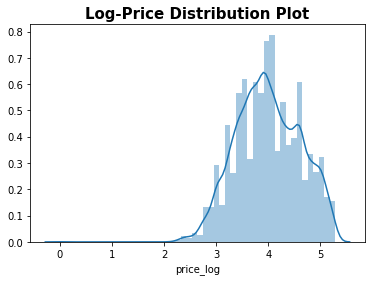

In [5]:
sns.distplot(clean_sum_listings['price_log'])
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

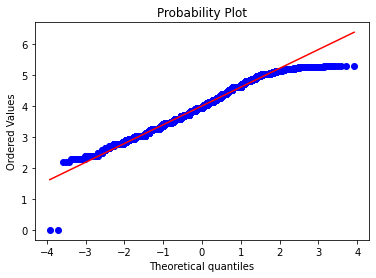

In [7]:
# good fit indicates that normality is a reasonable approximation

from scipy import stats
stats.probplot(clean_sum_listings['price_log'], plot=plt)
plt.show()

### 1.2 Dropping unecessary columns

In [8]:
# dropping columns 
clean_sum_listings = clean_sum_listings.drop(columns=['Unnamed: 0', 'name','host_id','price'])
clean_sum_listings.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price_log                         0
dtype: int64

### 2. Plotting Correlation Matrix

In [9]:
def heatmap_ml (df):
    corr = df.corr().round(2)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(16, 8))

        ax = sns.heatmap(corr, cmap = 'RdBu_r', annot=True,  mask=mask, vmax=1, vmin= -1, square=True)

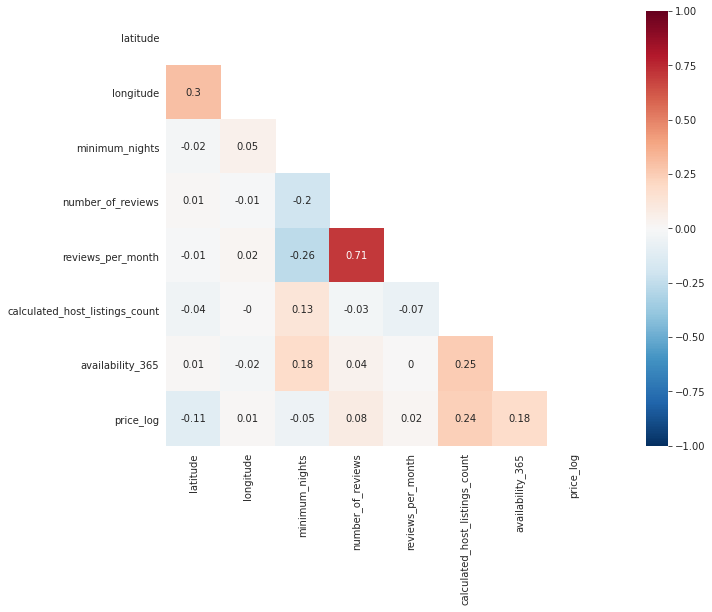

In [10]:
corr_matrix = heatmap_ml (clean_sum_listings)
corr_matrix

- The correlation matrix shows that there is no strong relationship between price and other features 
- This indicates no feature needed to be taken out of data

### 3. Enconding Features

In [8]:
categorical_features = clean_sum_listings.select_dtypes(include=['object'])
categorical_features_one_hot = pd.get_dummies(categorical_features)

numerical_features =  clean_sum_listings.select_dtypes(exclude=['object'])
y = numerical_features.price_log
numerical_features = numerical_features.drop(['price_log'], axis=1)

In [9]:
X = np.concatenate((numerical_features, categorical_features_one_hot), axis=1)
X = pd.concat([numerical_features, categorical_features_one_hot], axis=1)

data = pd.concat([X, y], axis = 1)

### 4. Train and Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42)

### Machine Learning

### Phase 1 - With All Features

- Linear Regression, Ridge Regression, Lasso Regression, and ElasticNet Regression models will be built
- GridSearchCV algorithm will be used to find the best parameters and tuning hyperparameters for each model
- 5-Fold Cross Validation with R2 and Mean Squared Error metrics will be used

In [ ]:
# Linear Regression

def linear_reg(x, y, cv=5):
    ## Defining parameters
    model_LR= LinearRegression()

    parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_LR = GridSearchCV(estimator=model_LR,  
                         param_grid=parameters,
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_LR.fit(x, y)
    best_parameters_LR = grid_search_LR.best_params_  
    best_score_LR = grid_search_LR.best_score_ 
    print(best_parameters_LR)
    print(best_score_LR)


linear_reg(X, y)

In [ ]:
# Ridge Regression

def ridge_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_Ridge= Ridge()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_Ridge = GridSearchCV(estimator=model_Ridge,  
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_Ridge.fit(input_x, input_y)
    best_parameters_Ridge = grid_search_Ridge.best_params_  
    best_score_Ridge = grid_search_Ridge.best_score_ 
    print(best_parameters_Ridge)
    print(best_score_Ridge)
    
# ridge_reg(X, y)

In [ ]:
### Lasso Regression ###

def lasso_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_Lasso= Lasso()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_lasso = GridSearchCV(estimator=model_Lasso,  
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_lasso.fit(input_x, input_y)
    best_parameters_lasso = grid_search_lasso.best_params_  
    best_score_lasso = grid_search_lasso.best_score_ 
    print(best_parameters_lasso)
    print(best_score_lasso)

# lasso_reg(X, y)

In [ ]:
### ElasticNet Regression ###

def elastic_reg(input_x, input_y,cv=5):
    ## Defining parameters
    model_grid_Elastic= ElasticNet()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_elastic = GridSearchCV(estimator=model_grid_Elastic,  
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_elastic.fit(input_x, input_y)
    best_parameters_elastic = grid_search_elastic.best_params_  
    best_score_elastic = grid_search_elastic.best_score_ 
    print(best_parameters_elastic)
    print(best_score_elastic)

# elastic_reg(X, y)

### K-Fold Cross Validation

In [19]:
from sklearn.model_selection import KFold, cross_val_score

n_folds = 5

def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 42).get_n_splits(numerical_features)
    return cross_val_score(model, X_train, y_train, scoring='r2', cv=kf)

In [ ]:
def rmse_cv_mse(model):
    kf = KFold(n_folds, shuffle=True, random_state = 42).get_n_splits(numerical_features)
    return cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)

In [20]:
for Model in [LinearRegression, Ridge, Lasso, ElasticNet, RandomForestRegressor]:
    cv_res = rmse_cv(Model())
    print('{}: {:.5f} +/- {:5f}'.format(Model.__name__, -cv_res.mean(), cv_res.std()))

LinearRegression: -0.38399 +/- 0.010557
Ridge: -0.38419 +/- 0.010271
Lasso: -0.07294 +/- 0.006514
ElasticNet: -0.08438 +/- 0.008503
RandomForestRegressor: -0.53314 +/- 0.004557


### Polynomial Transformation

The polynomial transformation will be made with a second degree which adding the square of each feature.

In [21]:
Poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train = Poly.fit_transform(X_train)
X_test = Poly.fit_transform(X_test)

### Prediction

In [22]:
##Linear Regression
lr = LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
lr.fit(X_train, y_train)
lr_pred= lr.predict(X_test)

#Ridge Model
ridge_model = Ridge(alpha = 0.01, normalize = True)
ridge_model.fit(X_train, y_train)             
pred_ridge = ridge_model.predict(X_test) 

#Lasso Model
Lasso_model = Lasso(alpha = 0.001, normalize =False)
Lasso_model.fit(X_train, y_train)
pred_Lasso = Lasso_model.predict(X_test) 

#ElasticNet Model
model_enet = ElasticNet(alpha = 0.01, normalize=False)
model_enet.fit(X_train, y_train) 
pred_test_enet= model_enet.predict(X_test)

#RandomForrestRegressor Model
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train) 
pred_test_rf= model_rf.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1236.7360233836716, tolerance: 0.46534989061388643
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1190.3138894068086, tolerance: 0.46534989061388643
  model = cd_fast.enet_coordinate_descent(


In [23]:
print('----------Linear Regression ---------------')

print('--Phase-1--')
print('MAE: %f'% mean_absolute_error(y_test, lr_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lr_pred)))   
print('R2 %f' % r2_score(y_test, lr_pred))

print('---------------Ridge ---------------------')

print('--Phase-1--')
print('MAE: %f'% mean_absolute_error(y_test, pred_ridge))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, pred_ridge)))   
print('R2 %f' % r2_score(y_test, pred_ridge))


print('---------------Lasso-----------------------')

print('--Phase-1--')
print('MAE: %f' % mean_absolute_error(y_test, pred_Lasso))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, pred_Lasso)))
print('R2 %f' % r2_score(y_test, pred_Lasso))

print('---------------ElasticNet-------------------')

print('--Phase-1 --')
print('MAE: %f' % mean_absolute_error(y_test,pred_test_enet)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,pred_test_enet))) #RMSE
print('R2 %f' % r2_score(y_test, pred_test_enet))

print('---------------RandomForrestRegressor-------------------')

print('--Phase-1 --')
print('MAE: %f' % mean_absolute_error(y_test,pred_test_rf)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,pred_test_rf))) #RMSE
print('R2 %f' % r2_score(y_test, pred_test_rf))

----------Linear Regression ---------------
--Phase-1--
MAE: 30579587811.814632
RMSE: 745209453923.039307
R2 -1456391897562184857681920.000000
---------------Ridge ---------------------
--Phase-1--
MAE: 0.376390
RMSE: 0.546846
R2 0.215754
---------------Lasso-----------------------
--Phase-1--
MAE: 0.377390
RMSE: 0.553114
R2 0.197674
---------------ElasticNet-------------------
--Phase-1 --
MAE: 0.377497
RMSE: 0.532865
R2 0.255344
---------------RandomForrestRegressor-------------------
--Phase-1 --
MAE: 0.309696
RMSE: 0.418308
R2 0.541104


### Hyperparameter Tuning the Random Forest in Python

In [72]:
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use BASE MODEL:\n')
pprint(model_rf.get_params())

Parameters currently in use BASE MODEL:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [25]:
# n_estimators = number of trees in the foreset
# max_features = max number of features considered for splitting a node
# max_depth = max number of levels in each decision tree
# min_samples_split = min number of data points placed in a node before the node is split
# min_samples_leaf = min number of data points allowed in a leaf node
# bootstrap = method for sampling data points (with or without replacement)

### Random Hyperparameter Grid

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators = [50, 70, 80, 90, 100]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(start = 10, stop = 110, num = 11)]
#max_depth.append(None)
max_depth = [None, 25, 50]

# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3]

# Method of selecting samples for training each tree
bootstrap = [True]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

### Random Search Training

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3,
                               verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

In [69]:
# best parameters from fitting the random search
rf_random.best_params_

{'n_estimators': 850,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

### Evaluation

In [26]:
#RandomForrestRegressor BaseModel
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train) 
pred_test_rf= model_rf.predict(X_test)

In [29]:
#RandomForrestRegressor TunedModel
best_random = RandomForestRegressor(n_estimators= 700, min_samples_split=2,min_samples_leaf=2,
                                    max_features= 'auto',max_depth=None, bootstrap= True)
best_random.fit(X_train, y_train) 
pred_test_best_random= best_random.predict(X_test)

In [30]:
print('---------------RandomForrestRegressor BaseModel-------------------')

print('MAE: %f' % mean_absolute_error(y_test,pred_test_rf)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,pred_test_rf))) #RMSE
print('R2 %f' % r2_score(y_test, pred_test_rf))

print('---------------RandomForrestRegressor TunedModel-------------------')

print('MAE: %f' % mean_absolute_error(y_test,pred_test_best_random)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,pred_test_best_random))) #RMSE
print('R2 %f' % r2_score(y_test, pred_test_best_random))

---------------RandomForrestRegressor BaseModel-------------------
MAE: 0.310067
RMSE: 0.418692
R2 0.540261
---------------RandomForrestRegressor TunedModel-------------------
MAE: 0.309581
RMSE: 0.418315
R2 0.541090


In [31]:
# {'n_estimators': 700,
#  'min_samples_split': 2,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 50,
#  'bootstrap': True}

# ---------------RandomForrestRegressor BaseModel-------------------
# MAE: 0.312153
# RMSE: 0.421678
# R2 0.533681
# ---------------RandomForrestRegressor TunedModel-------------------
# MAE: 0.309980
# RMSE: 0.418886
# R2 0.539835

# R2 diff = 0.006154

# ---

# {'n_estimators': 850,
#  'min_samples_split': 5,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': None,
#  'bootstrap': True}

# ---------------RandomForrestRegressor BaseModel-------------------
# MAE: 0.310067
# RMSE: 0.418692
# R2 0.540261
# ---------------RandomForrestRegressor TunedModel-------------------
# MAE: 0.310642
# RMSE: 0.419237
# R2 0.539065

# R2 diff = -0.001196

# ---

# {'n_estimators': 700,
#  'min_samples_split': 2,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': None,
#  'bootstrap': True}

# ---------------RandomForrestRegressor BaseModel-------------------
# MAE: 0.310067
# RMSE: 0.418692
# R2 0.540261
# ---------------RandomForrestRegressor TunedModel-------------------
# MAE: 0.309581
# RMSE: 0.418315
# R2 0.541090

# R2 diff = 0,000829

### Grid Search with Cross Validation

In [40]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [None, 50, 70, 90],
    'max_features': ['auto'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [500, 700, 900]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [41]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 51.2min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 97.7min finished


{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 700}

In [51]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=700, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [52]:
pred_test_best_grid = best_grid.predict(X_test)

In [49]:
print('---------------GridSearch Best-Grid-------------------')

print('MAE: %f' % mean_absolute_error(y_test,pred_test_best_grid)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,pred_test_best_grid))) #RMSE
print('R2 %f' % r2_score(y_test, pred_test_best_grid))

---------------GridSearch Best-Grid-------------------
MAE: 0.312082
RMSE: 0.420508
R2 0.536264


In [53]:
# another round of GridSearchCV

In [56]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [None, 50],
    'max_features': ['auto'],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [2, 3, 5],
    'n_estimators': [500, 600, 700]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search_final = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [57]:
grid_search_final.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 27.2min finished


In [65]:
grid_search_final.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 500}

In [60]:
pred_test_grid_search_final = grid_search_final.predict(X_test)

In [64]:
print('---------------GridSearch Final-------------------')

print('MAE: %f' % mean_absolute_error(y_test,pred_test_grid_search_final)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,pred_test_grid_search_final))) #RMSE
print('R2 %f' % r2_score(y_test, pred_test_grid_search_final))

---------------GridSearch Final-------------------
MAE: 0.309981
RMSE: 0.419379
R2 0.538751


### Final Model

In [71]:
final_model = best_random.best_params_

AttributeError: 'RandomForestRegressor' object has no attribute 'best_params_'

### XGBRegressor

In [76]:
import xgboost as xgboost

xgb = xgboost.XGBRegressor(n_estimators=310,learning_rate=0.1,objective='reg:squarederror')
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [79]:
print('---------------XGBRegressor-------------------')

print('MAE: %f' % mean_absolute_error(y_test,xgb_pred)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,xgb_pred))) #RMSE
print('R2 %f' % r2_score(y_test, xgb_pred))

---------------XGBRegressor-------------------
MAE: 0.328948
RMSE: 0.431533
R2 0.511630


In [83]:
from sklearn.model_selection import KFold, cross_val_score


xgb_baseline = xgboost.XGBRegressor(n_estimators=1000, learning_rate=0.05, early_stopping=5)

n_folds = 5

kf = KFold(n_folds, shuffle=True, random_state = 42).get_n_splits(numerical_features)

cv_res = cross_val_score(xgb_baseline, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
xgb_baseline.fit(X_train, y_train)

y_train_xgb_base = xgb_baseline.predict(X_train)
y_test_xgb_base = xgb_baseline.predict(X_test)

[00:27:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:32:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:37:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not

In [84]:
print('---------------XGBRegressor Base-------------------')

print('MAE: %f' % mean_absolute_error(y_test,y_test_xgb_base)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,y_test_xgb_base))) #RMSE
print('R2 %f' % r2_score(y_test, y_test_xgb_base))

---------------XGBRegressor Base-------------------
MAE: 0.327176
RMSE: 0.431116
R2 0.512573


In [19]:
from lightgbm import LGBMRegressor

In [20]:
clean_sum_listings.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_log'],
      dtype='object')

In [21]:
clean_sum_listings.dtypes

neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
price_log                         float64
dtype: object

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
categorical_features_one_hot

,neighbourhood_group_Ciutat Vella,neighbourhood_group_Eixample,neighbourhood_group_Gràcia,neighbourhood_group_Horta-Guinardó,neighbourhood_group_Les Corts,neighbourhood_group_Nou Barris,neighbourhood_group_Sant Andreu,neighbourhood_group_Sant Martí,neighbourhood_group_Sants-Montjuïc,neighbourhood_group_Sarrià-Sant Gervasi,...,neighbourhood_la Verneda i la Pau,neighbourhood_la Vila Olímpica del Poblenou,neighbourhood_la Vila de Gràcia,neighbourhood_les Corts,neighbourhood_les Roquetes,neighbourhood_les Tres Torres,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15748,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
15749,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
15750,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
15751,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
def transform_data(df, num_cols, cat_cols):
    transformed_df = df.copy()

    for col in cat_cols:
        transformed_df[col] = transformed_df[col].astype('category')
        transformed_df = pd.concat([transformed_df.drop(
            col, axis=1), pd.get_dummies(transformed_df[col], prefix=col)], axis=1)
    #transformed_df[num_cols] = transformed_df[num_cols].apply(lambda x: np.log1p(x))

    num_cols.drop('pricelog')
    scaler = MinMaxScaler()
    transformed_df[num_cols] = scaler.fit_transform(transformed_df[num_cols])

    return transformed_df

In [25]:
X_train.columns = X_train.columns.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [29]:
X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]

In [30]:
X_train.columns

Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_group_Ciutat_Vella',
       'neighbourhood_group_Eixample', 'neighbourhood_group_Gracia',
       'neighbourhood_group_Horta_Guinardo', 'neighbourhood_group_Les_Corts',
       'neighbourhood_group_Nou_Barris', 'neighbourhood_group_Sant_Andreu',
       'neighbourhood_group_Sant_Marti', 'neighbourhood_group_Sants_Montjuic',
       'neighbourhood_group_Sarria_Sant_Gervasi', 'neighbourhood_Can_Baro',
       'neighbourhood_Can_Peguera', 'neighbourhood_Canyelles',
       'neighbourhood_Ciutat_Meridiana',
       'neighbourhood_Diagonal_Mar_i_el_Front_Maritim_del_Poblenou',
       'neighbourhood_Horta', 'neighbourhood_Hostafrancs',
       'neighbourhood_Montbau', 'neighbourhood_Navas',
       'neighbourhood_Pedralbes', 'neighbourhood_Porta',
       'neighbourhood_Provencals_del_Poblenou', 'neighbourhood_Sant_Andreu',
     

In [31]:
model = LGBMRegressor()

model.fit(X_train, y_train)  
y_test_lgbm = model.predict(X_test) 

print('---------------LGBMRegressor-------------------')

print('MAE: %f' % mean_absolute_error(y_test,y_test_lgbm)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,y_test_lgbm))) #RMSE
print('R2 %f' % r2_score(y_test, y_test_lgbm))

---------------LGBMRegressor-------------------
MAE: 0.332553
RMSE: 0.434122
R2 0.505751


In [ ]:
model = LGBMRegressor()

model.fit(X_train, y_train)  
y_test_lgbm = model.predict(X_test) 

print('---------------LGBMRegressor-------------------')

print('MAE: %f' % mean_absolute_error(y_test,y_test_lgbm)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,y_test_lgbm))) #RMSE
print('R2 %f' % r2_score(y_test, y_test_lgbm))

In [ ]:
svr = SVR(kernel='linear')
model.fit(X_train, y_train)  
y_test_svr = model.predict(X_test) 

print('---------------LGBMRegressor-------------------')

print('MAE: %f' % mean_absolute_error(y_test,y_test_svr)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,y_test_svr))) #RMSE
print('R2 %f' % r2_score(y_test, y_test_svr))

In [ ]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

RANDOM_SEED = 42

svr = SVR(kernel='linear')
lasso = Lasso()
rf = RandomForestRegressor(n_estimators=5, 
                           random_state=RANDOM_SEED)

# Starting from v0.16.0, StackingCVRegressor supports
# `random_state` to get deterministic result.
stack = StackingCVRegressor(regressors=(svr, lasso, rf),
                            meta_regressor=lasso,
                            random_state=RANDOM_SEED)

print('5-fold cross validation scores:\n')

for clf, label in zip([svr, lasso, rf, stack], ['SVM', 'Lasso', 
                                                'Random Forest', 
                                                'StackingCVRegressor']):
    scores = cross_val_score(clf, X, y, cv=5)
    print("R^2 Score: %0.2f (+/- %0.2f) [%s]" % (
        scores.mean(), scores.std(), label))

5-fold cross validation scores:



In [ ]:
models = [LinearRegression, Ridge, Lasso, ElasticNet, SVR, RandomForestRegressor]
stack = StackingCVRegressor(models, meta_regressor = LinearRegression(), cv=10)
stack.fit(X_train.values, y_train.ravel())

y_pred_stack=stack.predict(X_test.values)    

# Phase 2 - Without All Features

- neighbourhood_group and room_type features will be dropped

In [ ]:
X.columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

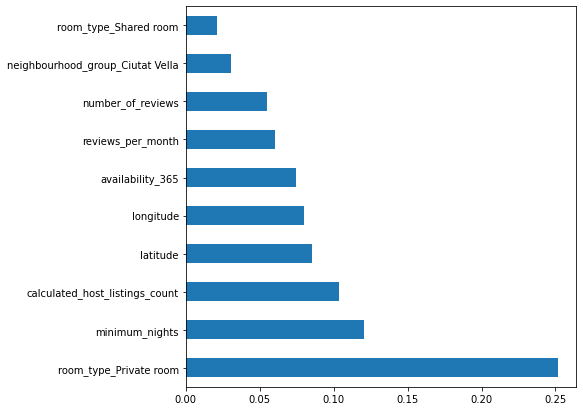

In [14]:
# change order of print values

from sklearn.ensemble import ExtraTreesRegressor

lab_enc = preprocessing.LabelEncoder()

feature_model = ExtraTreesRegressor(n_estimators=50)
feature_model.fit(X_train,lab_enc.fit_transform(y_train))

plt.figure(figsize=(7,7))
feat_importances = pd.Series(feature_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()